## Importing necessory libraries

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for encoding the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# for balancing the dataset
from imblearn.over_sampling import SMOTE

# To save the model
import pickle as pkl

#Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Model evaluators and splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

##### pip install --upgrade scikit-learn imbalanced-learn   -- incase imblearn is not working
##### pip install (use if anything is not working)

## Collecting the dataset

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()       # Quick view of the dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data Preprocessing

In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
# finding categorical columns

df.select_dtypes(include=['object']).columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

## Visual Analysis

### Univariate

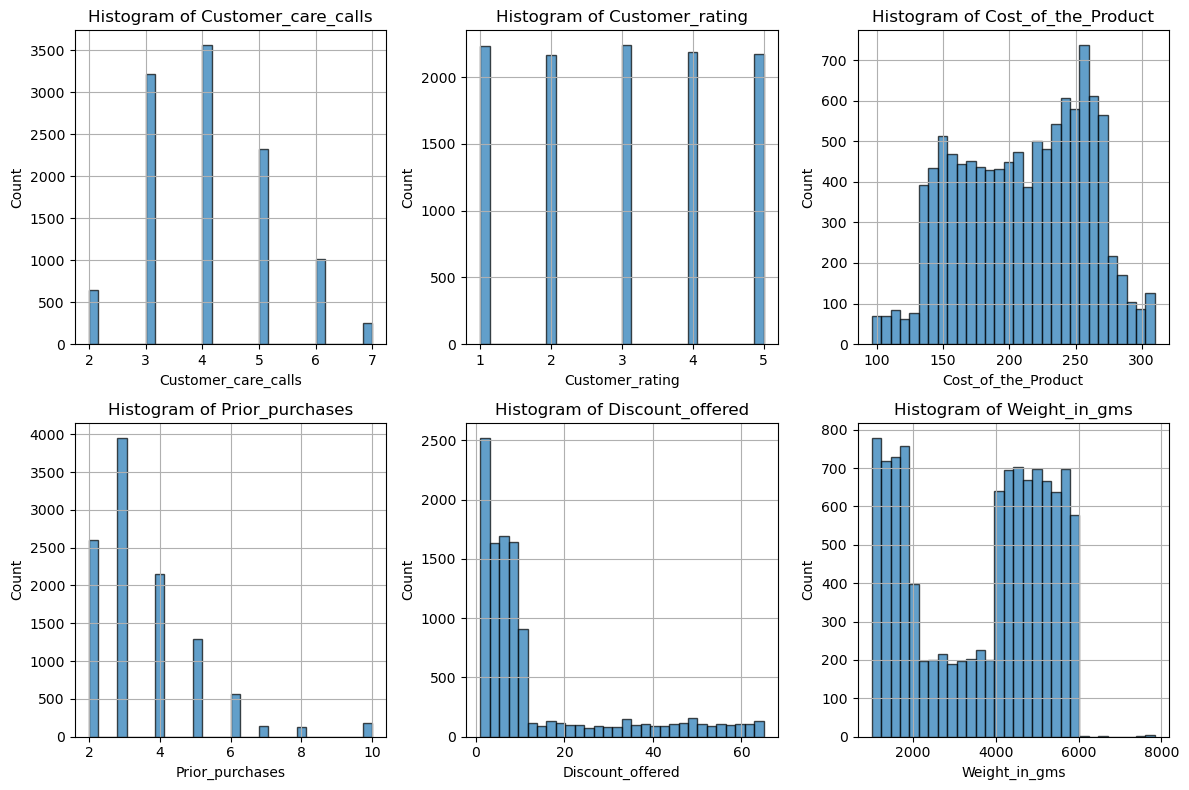

In [8]:
# List of numerical columns
numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


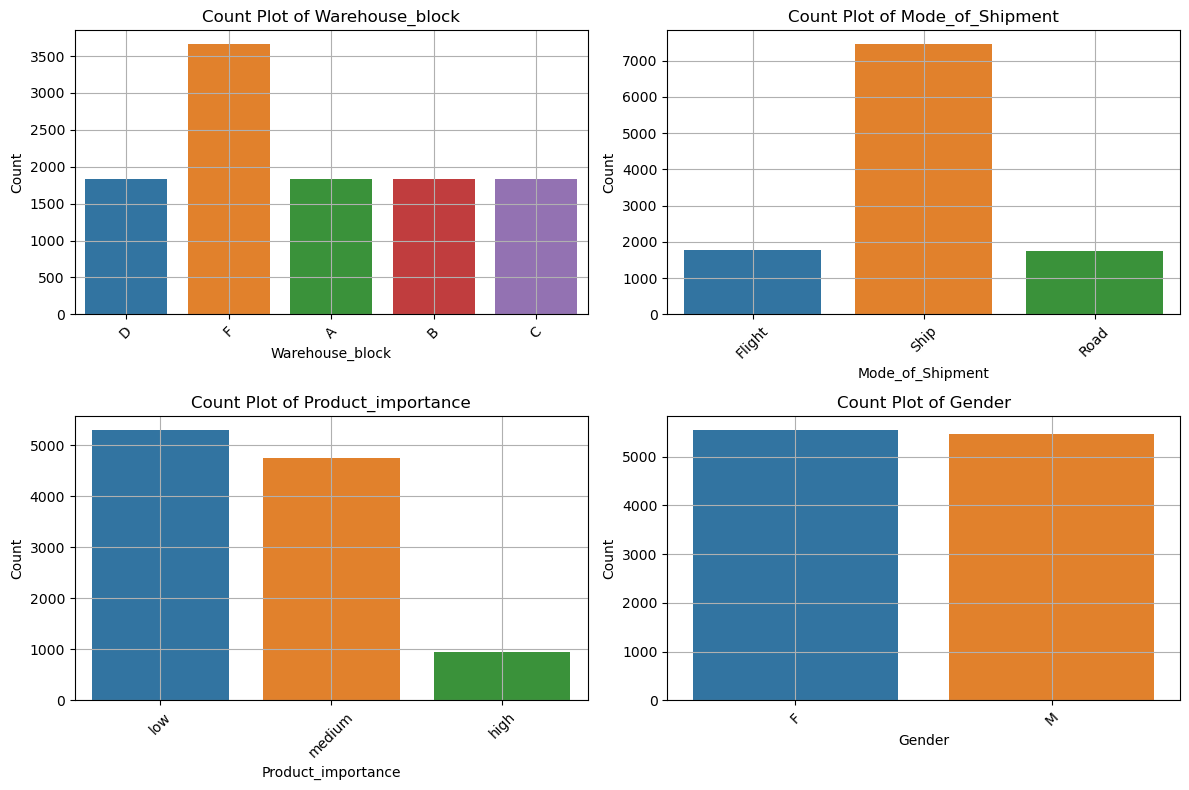

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Checking for outliers with boxplots

### Bivariate Analysis

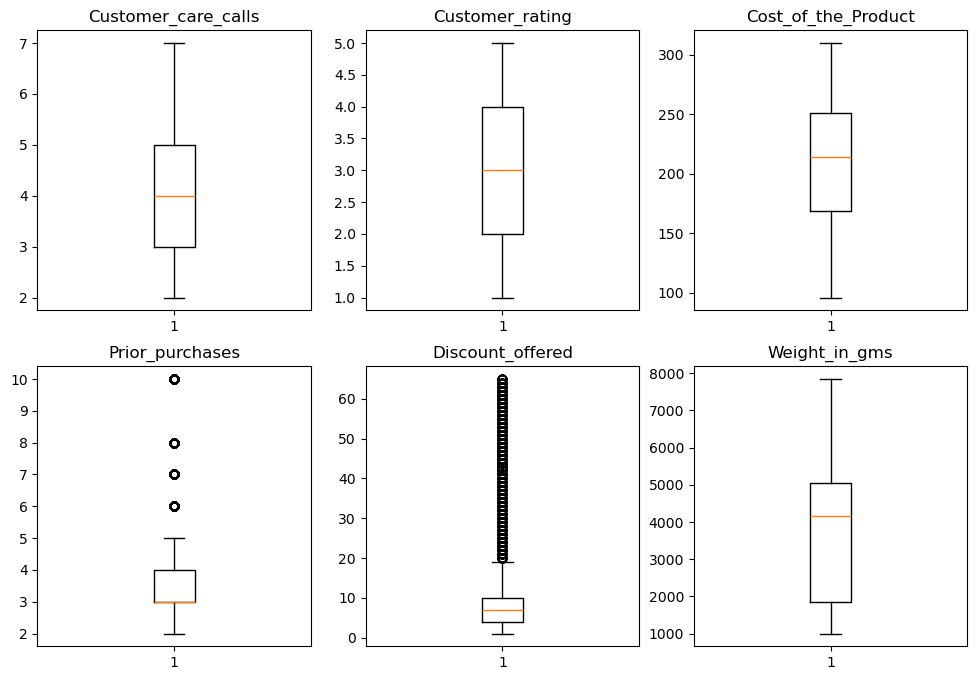

In [10]:
# Plotting box plots for numerical features
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.show()

### Removing outliers

#### By directly removing outliers, More than 2000 data points are being removed which are valuable with respect to other columns
#### to handle this outliers, data is being replaced with the mean of certain column

In [11]:
# 'Prior_purchases', 'Discount_offered

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()

    # Replace outliers with the mean
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    
    return df

df = remove_outliers(df, 'Prior_purchases')
df = remove_outliers(df, 'Discount_offered')

In [12]:
df.shape

(10999, 12)

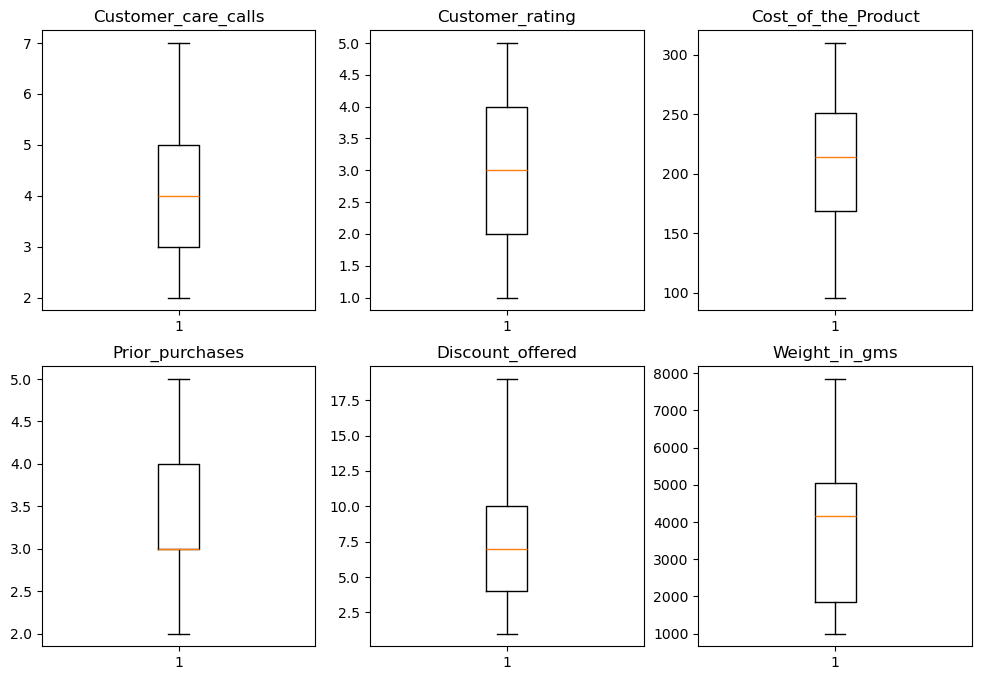

In [13]:
# checking the removal
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.show()

## Encoding 

In [14]:
le=LabelEncoder()
df.Product_importance=le.fit_transform(df.Product_importance)
df.Gender=le.fit_transform(df.Gender)
df.Mode_of_Shipment=le.fit_transform(df.Mode_of_Shipment)
df.Warehouse_block=le.fit_transform(df.Warehouse_block)

In [15]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3.0,1,0,13.373216,1233,1
1,2,4,0,4,5,216,2.0,1,1,13.373216,3088,1
2,3,0,0,2,2,183,4.0,1,1,13.373216,3374,1
3,4,1,0,3,3,176,4.0,2,1,10.000000,1177,1
4,5,2,0,2,2,184,3.0,2,0,13.373216,2484,1


### Multivariate analysis

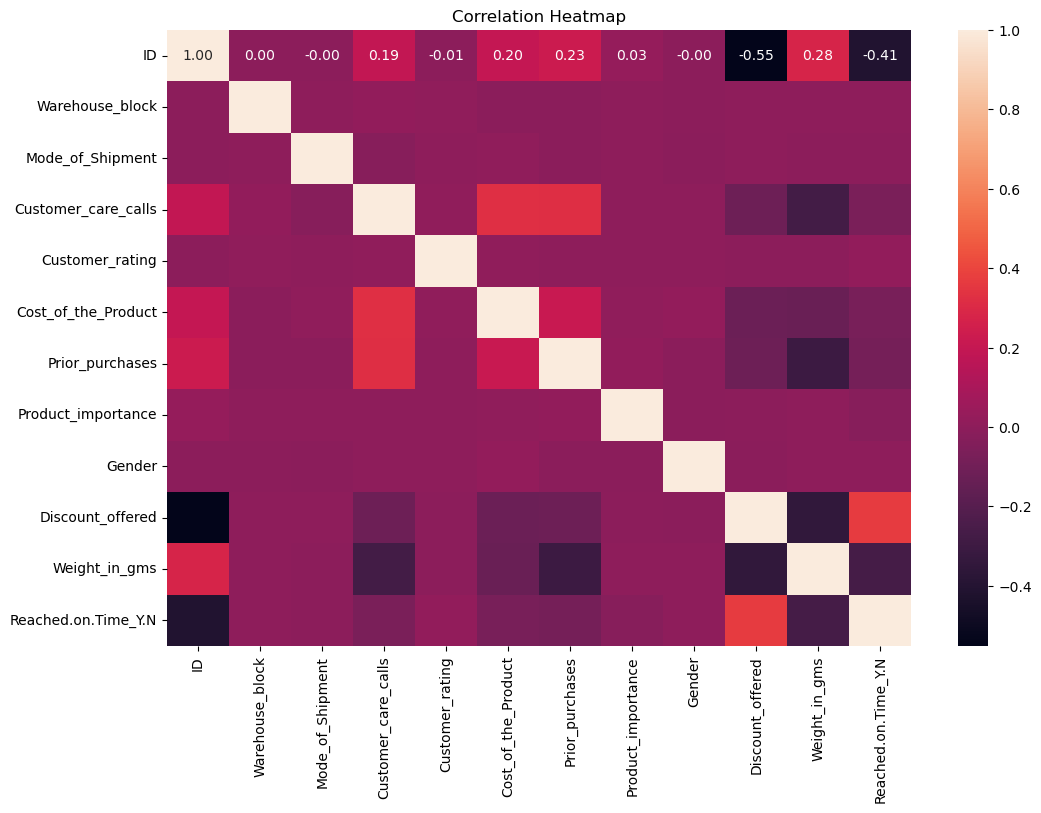

In [16]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Descriptive Analysis

In [17]:
df.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,2.333394,1.516865,4.054459,2.990545,210.196836,3.245413,1.346031,0.495863,7.460899,3634.016729,0.596691
std,3175.28214,1.490726,0.756894,1.141490,1.413603,48.063272,0.932466,0.631434,0.500006,4.325367,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,5.000000,2.000000,1.000000,19.000000,7846.000000,1.000000


In [18]:
# Removing id column and making x,y data

x=df.drop(columns=['ID','Reached.on.Time_Y.N'],axis=1)   # id wont effect
y=df['Reached.on.Time_Y.N']

### Checking for imbalance on target column

In [19]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [20]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)  # Using smote to balance data set with respect to target column because of huge difference

print(x.shape)       
print(y.value_counts())

(13126, 10)
Reached.on.Time_Y.N
1    6563
0    6563
Name: count, dtype: int64


###  2000 points are increased to balance the dataset

### Scaling the data and saving it

In [21]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x))

pkl.dump(sc,open("EcommerceScaler.pkl",'wb'))  

In [22]:
# if want to save preprocessed data use it
# x.to_csv('preprocessed_data.csv')

### Splitting the dataset

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)

(10500, 10)
(2626, 10)


# Initial Training, different models and testing with evaluation metrics

## Logistic regression

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
ypred=lr.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1321
           1       0.69      0.62      0.65      1305

    accuracy                           0.67      2626
   macro avg       0.68      0.67      0.67      2626
weighted avg       0.68      0.67      0.67      2626



In [27]:
print(confusion_matrix(y_test,ypred))

[[966 355]
 [500 805]]


## Random Forest

In [28]:
rf=RandomForestClassifier(criterion='entropy',random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [29]:
ypred1=rf.predict(x_test)
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1321
           1       0.81      0.62      0.70      1305

    accuracy                           0.74      2626
   macro avg       0.75      0.74      0.73      2626
weighted avg       0.75      0.74      0.73      2626



In [30]:
print(confusion_matrix(y_test,ypred1))

[[1130  191]
 [ 501  804]]


### Decision Tree

In [31]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
ypred2=dt.predict(x_test)
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1321
           1       0.69      0.71      0.70      1305

    accuracy                           0.70      2626
   macro avg       0.70      0.70      0.70      2626
weighted avg       0.70      0.70      0.70      2626



In [33]:
print(confusion_matrix(y_test,ypred2))

[[910 411]
 [377 928]]


### KNN

In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
ypred3=knn.predict(x_test)
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1321
           1       0.74      0.63      0.68      1305

    accuracy                           0.70      2626
   macro avg       0.71      0.70      0.70      2626
weighted avg       0.71      0.70      0.70      2626



In [36]:
print(confusion_matrix(y_test,ypred3))

[[1028  293]
 [ 487  818]]


### SVM-Support Vector Machine

In [37]:
model= SVC()
model.fit(x_train,y_train)

SVC()

In [38]:
ypred4=model.predict(x_test)
print(classification_report(y_test,ypred4))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      1321
           1       0.89      0.51      0.65      1305

    accuracy                           0.73      2626
   macro avg       0.77      0.72      0.71      2626
weighted avg       0.77      0.73      0.71      2626



In [39]:
print(confusion_matrix(y_test,ypred4))

[[1238   83]
 [ 638  667]]


### XG Boost

In [40]:
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
ypred5=xg.predict(x_test)
print(classification_report(y_test,ypred5))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1321
           1       0.76      0.66      0.70      1305

    accuracy                           0.73      2626
   macro avg       0.73      0.73      0.73      2626
weighted avg       0.73      0.73      0.73      2626



In [42]:
print(confusion_matrix(y_test,ypred5))

[[1052  269]
 [ 449  856]]


# Hyperparameter Tuning

### Hyperparameter Tuning for SVM

In [43]:
parameters={
    'kernel':['rbf'],
    'C':[0.1,0.01],
    'gamma':[0.01,0.0001]
}
fit1 = GridSearchCV(SVC(), param_grid=parameters,scoring='accuracy', n_jobs=-1,verbose=3)
fit1.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01], 'gamma': [0.01, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [44]:
print(fit1.best_estimator_,fit1.best_params_,fit1.best_score_)

SVC(C=0.1, gamma=0.01) {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} 0.6996190476190476


### Hyperparameter Tuning for Random forest

In [45]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'criterion': ['entropy'],
    'max_depth': [8,9],
    'max_features': ['log2','sqrt']
}
fit2=GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=3)
fit2.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8, 9],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [200, 300, 500]},
             scoring='accuracy', verbose=3)

In [46]:
print(fit2.best_estimator_,fit2.best_params_,fit2.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=500, random_state=1) {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 500} 0.7364761904761905


### Hyperparameter Tuning for Xg boost

In [47]:
params = {
    'min_child_weight': [10, 20],
    'gamma': [1.5, 2.0, 2.5],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'max_depth': [4, 5, 6]
}

xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=100,
                    objective='binary:logistic',
                    nthread=3)

fit3 = GridSearchCV(xgbc,param_grid=params,cv=5,refit=True,scoring='accuracy',n_jobs=-1,verbose=3)

fit3.fit(x_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, nthread=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 0.9],
                         'gamma': [1.5, 2.0, 2.5], 'max_depth': [4, 5, 6],
                         'min_child_weight': [10, 20]},
             scoring='accuracy', verbose=3)

In [48]:
print(fit3.best_estimator_,fit3.best_params_,fit3.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=3,
              num_parallel_tree=None, ...) {'colsample_bytree': 0.6, 'gamma': 2.5, 'max_depth': 5, 'min_child_weight': 10} 0.7291428571428572


# Predicting output for Random Forest
##### chosen for high accuracy of approx 74

In [49]:
fit2.predict(sc.transform([[1,0,4,4,200,2,3,1,12.22,2333]]))

array([1], dtype=int64)

In [50]:
fit2.predict(sc.transform([[3,2,3,3,203,2,1,1,9,5733]]))

array([0], dtype=int64)

# Saving the best model

##### saving in h5 format as told in training sessions

In [51]:
pkl.dump(fit2,open('Ecommerce_RF_74.h5','wb'))